# I-VN_stock

In [3]:
stock = Vnstock().stock(source='VCI')

2024-12-20 17:34:20 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-20 17:34:20 - vnstock3.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-20 17:34:20 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
year = '2022'
df_lst = stock.listing.symbols_by_exchange()
all_symbols = df_lst[df_lst['exchange'].isin(['HSX','HNX'])]['symbol'].to_list()
data = []
for symbol in all_symbols[0:6]:
    try:
        start = '2024-11-01'
        end = '2024-11-01'
        df = stock.quote.history(symbol=symbol, start=start, end=end)
        df['symbol'] =symbol
        data.append(df)
    except Exception:
        pass
        #df_price = pd.concat(data)  
        #df_price.to_sql('stock_prices', con=self.engine, if_exists='append', index=False)
df = pd.concat(data)
df

,time,open,high,low,close,volume,symbol
0,2024-11-01,10.4,10.7,10.2,10.6,2355400,YEG
0,2024-11-01,4.8,4.9,4.8,4.9,7400,WSS
0,2024-11-01,255.1,270.0,255.1,270.0,300,WCS
0,2024-11-01,16.3,16.5,16.0,16.2,834200,VTZ


In [5]:
stock = Vnstock().stock()
df = stock.quote.history(symbol='AAA', start='2005-01-01', end='2024-12-16')
df_acb = df[['time','close','volume']]
df_acb      

2024-12-20 17:35:51 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-20 17:35:51 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,time,close,volume
0,2010-07-15,10.65,174100
1,2010-07-16,10.17,109200
2,2010-07-19,10.13,104900
3,2010-07-20,9.88,328700
4,2010-07-21,9.86,75800
...,...,...,...
3593,2024-12-10,8.75,1075700
3594,2024-12-11,8.75,834300
3595,2024-12-12,8.83,1972800
3596,2024-12-13,8.72,717400


In [13]:
from sqlalchemy import create_engine
host= 'localhost'
user='root'
password= 'Eninoskybaby94$'
database= 'STOCK'
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')
df_acb.to_sql('stock_prices', con=engine, if_exists='append', index=False)


4504

In [ ]:
from vnstock3 import Vnstock
stock = Vnstock().stock(source='VCI')
df_lst = stock.listing.symbols_by_exchange()
all_symbols = df_lst[df_lst['exchange'].isin(['HSX','HNX'])]['symbol'].to_list()
data = []
for symbol in all_symbols[0:7]:
    try:
        stock_data = Vnstock(show_log=False).stock(symbol=symbol, source='VCI').finance.ratio(period='quarter', lang='vi', dropna=True)
        data.append(stock_data)
    except Exception:
        pass
df = pd.concat(data) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 10
Data columns (total 37 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   (Meta, CP)                                                   68 non-null     object 
 1   (Meta, Năm)                                                  68 non-null     int64  
 2   (Meta, Kỳ)                                                   68 non-null     int64  
 3   (Chỉ tiêu cơ cấu nguồn vốn, (Vay NH+DH)/VCSH)                57 non-null     float64
 4   (Chỉ tiêu cơ cấu nguồn vốn, Nợ/VCSH)                         68 non-null     float64
 5   (Chỉ tiêu cơ cấu nguồn vốn, TSCĐ / Vốn CSH)                  68 non-null     float64
 6   (Chỉ tiêu cơ cấu nguồn vốn, Vốn CSH/Vốn điều lệ)             68 non-null     float64
 7   (Chỉ tiêu hiệu quả hoạt động, Vòng quay tài sản)             68 non-null     float64
 8

In [4]:
from vnstock3 import Vnstock
stock_data = Vnstock(show_log=False).stock(symbol='ACB', source='VCI').finance.ratio(period='quarter', lang='en', dropna=True)
stock_data.columns
lst = [col[1] for col in stock_data.columns ]
dic = dict(zip(lst,stock_data.columns))
#stock_data.rename(columns=dic,inplace=True)
stock_data.columns = stock_data.columns.droplevel(0)
stock_data.columns = [col.strip() for col in stock_data.columns] 


Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [1]:
from vnstock3 import Vnstock
import pandas as pd
import matplotlib.pyplot as plt
from vnstock3 import Vnstock
stock= Vnstock().stock()
df_lst = stock.listing.symbols_by_exchange()
all_symbols = df_lst[df_lst['exchange'].isin(['HNX'])]['symbol'].to_list()
data = []
for symbol in all_symbols:
    try:
        company = Vnstock().stock(symbol=symbol, source='TCBS').company.overview() 
        company['symbol'] =symbol
        data.append(company)
    except Exception:
        pass
        #df_price = pd.concat(data)  
        #df_price.to_sql('stock_prices', con=self.engine, if_exists='append', index=False)
df = pd.concat(data)
df

2024-12-13 09:24:17 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-13 09:24:17 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-12-13 09:24:24 - vnstock3.common.data.data_explorer - WARNING - Nguồn TCBS hiện tại chỉ hỗ trợ các thông tin về giá và giao dịch, không hỗ trợ thông tin công ty.
2024-12-13 09:24:24 - vnstock3.common.data.data_explorer - WARNING - Nguồn TCBS hiện tại chỉ hỗ trợ các thông tin về giá và giao dịch, không hỗ trợ thông tin công ty.
2024-12-13 09:24:24 - vnstock3.common.data.data_explorer - WARNING - Nguồn TCBS hiện tại chỉ hỗ trợ các thông tin về giá và giao dịch, không hỗ trợ thông tin công ty.
2024-12-13 09:24:24 - vnstock3.common.data.data_explorer - WARNING - Nguồn TCBS hiện tại chỉ hỗ trợ các thông tin về giá và giao dịch, không hỗ trợ thông tin công ty.
The behavior of DataFrame concatenation with empty or all-NA entries is depre

,exchange,industry,company_type,no_shareholders,foreign_percent,outstanding_share,issue_share,established_year,no_employees,stock_rating,delta_in_week,delta_in_month,delta_in_year,short_name,website,industry_id,industry_id_v2,symbol
0,HNX,Hàng cá nhân & Gia dụng,CT,2576,0.002,17.3,17.3,2008,2010,NaN,-0.063,0.026,0.162,May mặc X20,https://gatexco20.com.vn,226,3763,X20
0,HNX,Dịch vụ tài chính,CK,1141,0.021,50.3,50.3,2007,24,2.5,0.000,-0.034,-0.388,Chứng khoán Phố Wall,http://www.wss.com.vn,300,8777,WSS
0,HNX,Hàng & Dịch vụ Công nghiệp,CT,0,0.284,2.5,2.5,2006,150,3.2,0.000,-0.051,0.431,Bến xe Miền Tây,https://www.bxmt.com.vn,193,2777,WCS
0,HNX,Hóa chất,CT,440,0.012,48.2,48.2,2011,236,2.1,-0.028,0.088,1.266,Nhựa Việt Thành,https://vithacoplastic.com,150,1353,VTZ
0,HNX,Xây dựng và Vật liệu,CT,0,0.003,31.2,31.2,2006,199,2.4,-0.080,-0.094,0.048,Năng lượng và Môi trường VICEM,http://www.vtvxm.vn,180,2353,VTV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,HNX,Hàng & Dịch vụ Công nghiệp,CT,238,0.022,65.2,65.2,1995,181,2.2,-0.062,-0.114,-0.597,Cơ điện Alphanam,https://alphanamec.com.vn,187,2737,AME
0,HNX,Tài nguyên Cơ bản,CT,160,0.029,2.9,2.9,2001,103,NaN,0.076,-0.002,-0.059,Khoáng sản Á Châu,https://amcvina.vn/vi/,166,1775,AMC
0,HNX,Truyền thông,CT,544,0.031,5.7,6.2,1989,268,2.7,-0.031,-0.101,-0.103,Văn hóa Tân Bình,https://alta.com.vn,256,5557,ALT
0,HNX,Truyền thông,CT,250,0.083,4.0,4.0,2006,379,NaN,0.000,-0.014,0.130,Mĩ thuật và Truyền thông,https://adc.net.vn,256,5557,ADC


In [1]:
# creat line plot


In [3]:
from sqlalchemy import create_engine
host= 'localhost'
user='root'
password= 'Eninoskybaby94$'
database= 'STOCK'
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')
df[df.columns[4:]].to_sql('Company_profile', con=engine, if_exists='append', index=False)


256

In [32]:
df[df.columns[4:]]

,foreign_percent,outstanding_share,issue_share,established_year,no_employees,stock_rating,delta_in_week,delta_in_month,delta_in_year,short_name,website,industry_id,industry_id_v2,symbol
0,0.095,137.0,137.0,2006,189,4.1,0.091,0.248,0.230,Tập đoàn Yeah1,https://yeah1group.com,254,5553,YEG
0,0.003,14.3,14.3,2015,223,NaN,-0.005,-0.064,0.147,Khoáng sản CN Yên Bái,https://ybm.com.vn,166,1775,YBM
0,0.074,121.8,121.8,2009,17830,3.0,-0.031,0.269,1.717,Bưu chính Viettel,https://viettelpost.com.vn,190,2771,VTP
0,0.133,79.9,79.9,2005,542,2.9,-0.003,0.045,0.514,VITACO,https://vitaco.petrolimex.com.vn,191,2773,VTO
0,0.017,10.8,12.0,2004,105,NaN,0.019,-0.014,-0.057,Viettronics Tân Bình,http://www.vtb.com.vn,186,2733,VTB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000,80.0,80.0,2004,63,2.8,0.235,0.279,-0.274,DV Nông nghiệp Bình Thuận,http://www.bitagco.com,151,1357,ABS
0,0.484,20.0,20.0,2012,16,1.4,0.139,0.109,0.181,Đầu tư Nhãn Hiệu Việt,http://www.vbinvest.com.vn,195,2791,ABR
0,0.008,70.8,70.8,1995,634,1.3,0.030,0.019,-0.429,Tập đoàn Tiên Sơn Thanh Hóa,http://tiensonaus.com,226,3763,AAT
0,0.009,10.5,12.3,2002,146,NaN,0.003,0.036,-0.403,Thủy sản Mekong,http://www.mekongfish.vn,217,3573,AAM


In [17]:
stock= Vnstock().stock()
df_lst = stock.listing.symbols_by_exchange()
all_symbols = df_lst[df_lst['exchange'].isin(['HSX'])]['symbol'].to_list()
'ACB'in all_symbols

2024-12-12 21:54:04 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-12-12 21:54:04 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


True

In [149]:
'ACB' in all_symbols

True

In [ ]:
company = Vnstock().stock(symbol='ACB', source='TCBS').company.overview() 
company


,exchange,industry,company_type,no_shareholders,foreign_percent,outstanding_share,issue_share,established_year,no_employees,stock_rating,delta_in_week,delta_in_month,delta_in_year,short_name,website,industry_id,industry_id_v2
0,HOSE,Ngân hàng,NH,60034,0.3,4466.7,4466.7,2006,13110,2.0,-0.015,0.004,0.219,ACB,https://www.acb.com.vn,289,8355


In [14]:
company = Vnstock().stock(symbol='YEG', source='TCBS').company.overview() 
company

,exchange,industry,company_type,no_shareholders,foreign_percent,outstanding_share,issue_share,established_year,no_employees,stock_rating,delta_in_week,delta_in_month,delta_in_year,short_name,website,industry_id,industry_id_v2
0,HOSE,Truyền thông,CT,310,0.095,137.0,137.0,2006,189,4.1,0.091,0.248,0.23,Tập đoàn Yeah1,https://yeah1group.com,254,5553


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 0 to 0
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   exchange           402 non-null    object 
 1   industry           402 non-null    object 
 2   company_type       402 non-null    object 
 3   no_shareholders    402 non-null    int64  
 4   foreign_percent    402 non-null    float64
 5   outstanding_share  402 non-null    float64
 6   issue_share        402 non-null    float64
 7   established_year   402 non-null    object 
 8   no_employees       402 non-null    int64  
 9   stock_rating       298 non-null    float64
 10  delta_in_week      402 non-null    float64
 11  delta_in_month     402 non-null    float64
 12  delta_in_year      401 non-null    float64
 13  short_name         402 non-null    object 
 14  website            402 non-null    object 
 15  industry_id        402 non-null    int64  
 16  industry_id_v2     402 non-null  

In [ ]:
symbol = df['symbol'].values
lst = list(symbol)
diff = [val for val in all_symbols if val not in lst]
data = []
diff[4]
for i in diff:   
    try:
        company = Vnstock().stock(symbol=i, source='TCBS').company
        company.overview().info()
        data.append(i)
    except Exception as e:
        pass
data



<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   exchange           1 non-null      object 
 1   industry           1 non-null      object 
 2   company_type       1 non-null      object 
 3   no_shareholders    1 non-null      int64  
 4   foreign_percent    1 non-null      float64
 5   outstanding_share  1 non-null      float64
 6   issue_share        1 non-null      float64
 7   established_year   1 non-null      object 
 8   no_employees       1 non-null      int64  
 9   stock_rating       1 non-null      float64
 10  delta_in_week      1 non-null      float64
 11  delta_in_month     1 non-null      float64
 12  delta_in_year      1 non-null      float64
 13  short_name         1 non-null      object 
 14  website            1 non-null      object 
 15  industry_id        1 non-null      int64  
 16  industry_id_v2     1 non-null      

['TTA',
 'TSC',
 'TSB',
 'TRC',
 'TRA',
 'TPP',
 'TPH',
 'TPC',
 'TPB',
 'TOT',
 'TNT',
 'TNI',
 'TNH',
 'TNG',
 'TNC',
 'TN1',
 'TMX',
 'TMT',
 'TMS',
 'TMP',
 'TMC',
 'TMB',
 'TLH',
 'TLG',
 'TLD',
 'TKU',
 'TKG',
 'TJC',
 'TIX',
 'TIP',
 'TIG',
 'THT',
 'THS',
 'THG',
 'THD',
 'THB',
 'TFC',
 'TET',
 'TEG',
 'TDW',
 'TDT',
 'TDP',
 'TDM',
 'TDH',
 'TDG',
 'TDC',
 'TCT',
 'TCR',
 'TCO',
 'TCM',
 'TCL',
 'TCI',
 'TCH',
 'TCD',
 'TCB',
 'TBX',
 'TBC',
 'TA9',
 'SZL',
 'SZC',
 'SZB',
 'SVT',
 'SVN',
 'SVI',
 'SVD',
 'SVC',
 'STP',
 'STK',
 'STG',
 'STC',
 'STB',
 'ST8',
 'SSM',
 'SSI',
 'SSC',
 'SSB',
 'SRF',
 'SRC',
 'SRA',
 'SPM',
 'SPI',
 'SPC',
 'SMT',
 'SMN',
 'PLX',
 'PLP',
 'PLC',
 'PJT',
 'PJC',
 'PIT',
 'PIC',
 'PIA',
 'PHR',
 'PHN',
 'PHC',
 'PGV',
 'PGT',
 'PGS',
 'PGN',
 'PGI',
 'PDR',
 'PDN',
 'PDB',
 'PCT',
 'PCH',
 'PCG',
 'PCE',
 'PC1',
 'PBP',
 'PAN',
 'PAC',
 'ORS',
 'OPC',
 'ONE',
 'OGC',
 'OCH',
 'OCB',
 'NVT',
 'NVL',
 'NVB',
 'NTP',
 'NTL',
 'NTH',
 'NT2',
 'NST',


In [11]:
stock = Vnstock().stock(symbol='VCI', source='VCI')
# Balance Sheet
#stock.finance.balance_sheet(period='quarter', lang='en')
# P&L
#stock.finance.income_statement(period='quarter')
#cash_flow
#stock.finance.cash_flow(period='quarter', lang='en')


In [13]:
import pandas as pd
stock= Vnstock().stock(source='VCI')
df_lst = stock.listing.symbols_by_exchange()
all_symbols = df_lst[df_lst['exchange'].isin(['HSX','HNX'])]['symbol'].to_list()
data =[]
for symbol in all_symbols[0:2]:
    try:
        df_Pnl = Vnstock(show_log=False).stock(symbol=symbol, source='VCI').finance.income_statement(period='quarter')
        df_Pnl['symbol'] =symbol
        data.append(df_Pnl)
    except Exception:
            pass
df = pd.concat(data)
df

,ticker,yearReport,lengthReport,Revenue YoY (%),Revenue (Bn. VND),Attribute to parent company (Bn. VND),Attribute to parent company YoY (%),Financial Income,Interest Expenses,Sales,...,Other income,Other Income/Expenses,Net other income/expenses,Profit before tax,Business income tax - current,Business income tax - deferred,Net Profit For the Year,Minority Interest,Attributable to parent company,symbol
0,YEG,2024,3,2.094204,345034035848,26075448752,3.255752,24509238436,-8044891313,345034035848,...,1403477,-2077959173,-2076555696,34009885720,434455909,-1.478889e+08,34296452740,8221003988,26075448752,YEG
1,YEG,2024,2,1.582740,210544023453,11958859259,1.049939,40878975113,-3661713432,210544023453,...,-435752650,-2162691413,-2598444063,13507128454,-434455909,-3.624665e+09,9448007070,-2510852189,11958859259,YEG
2,YEG,2024,1,0.189685,73492441517,17176210506,3.153024,36112656158,-4644865289,73492441517,...,478092282,-30964935,447127347,12006444191,0,0.000000e+00,12006444191,-5169766315,17176210506,YEG
3,YEG,2023,4,0.399074,158872970104,14808068737,5.928702,11946159000,-4535064214,158872970104,...,813498165,-1063370009,-249871844,18778529492,-982606,0.000000e+00,18777546886,3969478149,14808068737,YEG
4,YEG,2023,3,0.575916,111509776815,6127106507,-0.376842,10763981555,-6895386329,111509776815,...,605464451,-48038504,557425947,3211261171,0,0.000000e+00,3211261171,-2915845336,6127106507,YEG
5,YEG,2023,2,0.175658,81519644694,5833762704,-0.002146,15357033869,-6145001268,81519644694,...,389290909,-4793914552,-4404623643,1201016335,3929753635,0.000000e+00,5130769970,-702992734,5833762704,YEG
6,YEG,2023,1,-0.084850,61774689781,4135831999,3.742094,5697821375,-3903071132,61774689781,...,90909091,-451629641,-360720550,4009017312,0,0.000000e+00,4009017312,-126814687,4135831999,YEG
7,YEG,2022,4,-0.541653,113555820687,2137206617,-0.992246,26955234972,-3997702610,113555820687,...,7572579358,-17517078839,-9944499481,8970181059,0,0.000000e+00,8970181059,6832974442,2137206617,YEG
8,YEG,2022,3,-0.744992,70758686504,9832342280,1.158601,31250502358,-2706021180,70758686504,...,2128376569,-4194444431,-2066067862,20939792705,-6142567760,0.000000e+00,14797224945,4964882665,9832342280,YEG
9,YEG,2022,2,-0.777456,69339614427,5846307384,1.038632,19009614,2217559238,69339614427,...,-3853882549,-1804050891,-5657933440,7157521945,-308109677,0.000000e+00,6849412268,1003104884,5846307384,YEG


In [169]:
data = []
for symbol in all_symbols[0:1]:
            try:
                df_bs = Vnstock(show_log=False).stock(symbol=symbol, source='TCBS').finance.balance_sheet( period='quarter')
                df_bs['symbol'] =symbol
                data.append(df_bs)
            except Exception:
                    pass
df = pd.concat(data) 
df

,quarter,year,short_asset,cash,short_invest,short_receivable,inventory,long_asset,fixed_asset,asset,debt,short_debt,long_debt,equity,capital,other_debt,un_distributed_income,minor_share_holder_profit,payable,symbol
period,,,,,,,,,,,,,,,,,,,,
2024-Q3,3,2024,1231,17,0,1133,54,1192,177,2423,988,499,32,1435,1370,132,0.0,50,988,YEG
2024-Q2,2,2024,1068,7,0,1010,38,929,108,1997,596,203,37,1401,1314,69,0.0,1,596,YEG
2024-Q1,1,2024,952,6,0,891,38,885,93,1837,453,129,39,1384,1314,80,0.0,-5,453,YEG
2023-Q4,4,2023,974,4,4,870,71,910,86,1883,495,165,48,1388,763,75,0.0,13,495,YEG
2023-Q3,3,2023,974,10,0,883,21,878,77,1852,483,142,50,1369,763,50,0.0,9,483,YEG
2023-Q2,2,2023,688,7,0,604,19,822,10,1509,594,362,2,916,313,53,0.0,12,594,YEG
2023-Q1,1,2023,508,11,0,423,32,954,11,1462,551,335,1,911,313,40,0.0,12,551,YEG
2022-Q4,4,2022,642,27,0,564,37,605,13,1247,337,82,1,910,313,81,0.0,19,337,YEG
2022-Q3,3,2022,709,6,0,630,55,556,19,1265,362,112,1,903,313,67,0.0,13,362,YEG


In [168]:

df_bs = Vnstock(show_log=False).stock(symbol=all_symbols[1], source='TCBS').finance.balance_sheet( period='quarter')
df_bs['symbol'] =symbol
df_bs
            

,quarter,year,short_asset,cash,short_invest,short_receivable,inventory,long_asset,fixed_asset,asset,debt,short_debt,long_debt,equity,capital,other_debt,un_distributed_income,minor_share_holder_profit,payable,symbol
period,,,,,,,,,,,,,,,,,,,,
2024-Q3,3,2024,337,9,2,190,102,301,293,639,454,263,104,185,143,0,0.0,0,454,YEG
2024-Q2,2,2024,318,11,8,177,89,301,292,619,436,249,111,183,143,7,0.0,0,436,YEG
2024-Q1,1,2024,307,27,27,137,84,303,263,610,425,258,112,185,143,1,0.0,0,425,YEG
2023-Q4,4,2023,319,21,11,150,107,246,235,565,384,232,86,181,143,0,0.0,0,384,YEG
2023-Q3,3,2023,250,9,0,146,67,237,228,487,309,191,59,178,143,11,0.0,0,309,YEG
2023-Q2,2,2023,272,18,0,174,56,211,195,483,308,187,57,175,143,7,0.0,0,308,YEG
2023-Q1,1,2023,205,17,0,128,44,201,186,406,228,148,31,179,143,1,0.0,0,228,YEG
2022-Q4,4,2022,205,19,0,94,74,205,189,410,236,151,41,174,143,1,0.0,0,236,YEG
2022-Q3,3,2022,208,7,0,100,82,209,194,417,245,160,45,173,143,0,0.0,0,245,YEG


# II - Stock

In [2]:
import Stock_ETL  as st
import pandas as pd
stock = st.Stock_Importer('STOCK','Eninoskybaby94$')
def query(query):   
    data = pd.read_sql(query, con=stock.engine)
    return data
df1 = query('select * from Stock_returns_05_25')

2025-02-19 23:39:06 - vnstock.common.data.data_explorer - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M


finnished.....
   id_exchange  exchange
0            1     UPCOM
1            2       HSX
2            3  DELISTED
3            4       HNX
4            5      BOND


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

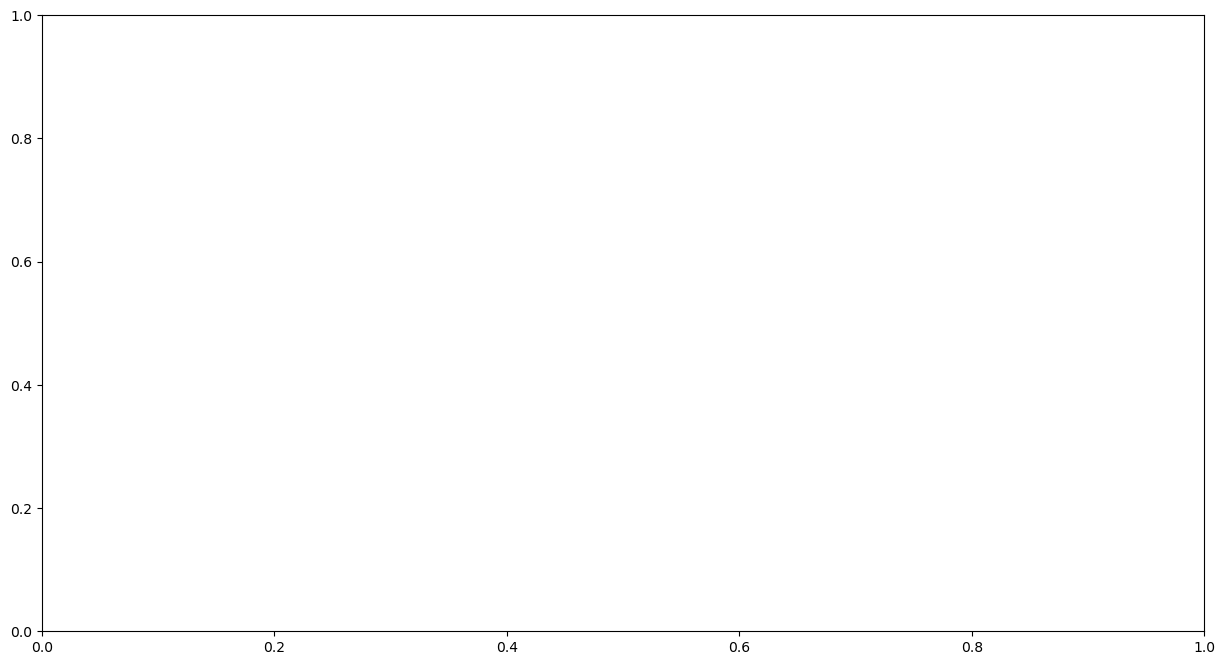

In [15]:
# Plot multiple symbols on the same chart
plt.figure(figsize=(15, 8))

# Get unique symbols from df1
symbols = df1['symbol'].unique()[:5]  # Limiting to first 5 symbols for clarity

for symbol in symbols:
    data = df1[df1['symbol'] == symbol]
    plt.plot(data['TIME'], data['close'], label=symbol)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import matplotlib.pyplot as plt

def create_line_chart(x_data, y_data, x_label, y_label, title):
    plt.plot(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()
# Example usage
df = df1[df1['symbol']=='AAA']
create_line_chart(df['time'], df['close'], 'Date', 'Close Price', 'AAA Close Price')

KeyError: 'time'

In [6]:
len(df1['symbol'].unique())

392

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

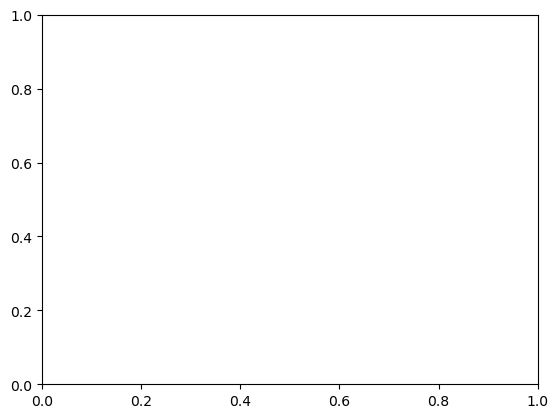

In [13]:
import matplotlib.pyplot as plt
df_symbol = df1[df1['symbol']=='AAA']
def create_line_chart(x_data, y_data, x_label, y_label, title):
    plt.plot(x_data, y_data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()

create_line_chart(df_symbol['TIME'], df_symbol['close'], 'Date', 'Close Price', f'{symbol} Close Price')

In [10]:
# Filter the data for a specific symbol if needed
df1_filtered = df1[df1['symbol'] == 'AAA']

# Create the line chart
create_line_chart(df1_filtered['TIME'], df1_filtered['close'], 'Date', 'Close Price', 'AAA Close Price')

NameError: name 'create_line_chart' is not defined

In [9]:
df1.columns

Index(['symbol', 'TIME', 'close', 'previous_close', 'daily_return',
       'change_price', 'rn'],
      dtype='object')